In [1]:
#from google.colab import drive
import pandas as pd
import numpy as np
#load data to Google Drive
#drive.mount('/content/gdrive')

In [2]:
#path = 'gdrive/My Drive/BT4222/data/twitter_train.csv'
df = pd.read_csv('./twitter_train.csv')

In [3]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [4]:
df.shape

(27481, 4)

In [5]:
df[df.isnull().any(axis=1)]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [6]:
df = df.dropna(subset=['text'])

In [7]:
# Drop the only NaN row
df.shape

(27480, 4)

In [8]:
#Check if all rows are non-null
len(df[df.isnull().any(axis=1)]) == 0

True

In [9]:
df['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [10]:
# Encode snetiment with numerics
def encode_sentiment(x):
  if x == 'positive':
    return 1
  elif x == 'negative':
    return -1
  else:
    return 0

In [11]:
df['sentiment'] = df['sentiment'].apply(encode_sentiment)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
df.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,-1
2,088c60f138,my boss is bullying me...,bullying me,-1


In [13]:
obs_num = min(df['sentiment'].value_counts())

df_class_positive = df[df['sentiment'] == 1]
df_class_neutral = df[df['sentiment'] == 0]
df_class_negative = df[df['sentiment'] == -1]

sample_positive = df_class_positive.sample(obs_num)
sample_neutral = df_class_neutral.sample(obs_num)
sample_negative = df_class_negative.sample(obs_num)

#Concat and shuffle
df_new = pd.concat([sample_positive, sample_neutral, sample_negative], axis=0).sample(frac=1)

In [14]:
df_new.sentiment.value_counts()

-1    7781
 1    7781
 0    7781
Name: sentiment, dtype: int64

In [15]:
X_train = df_new.text
y_train = df_new.sentiment

In [16]:
#path_test = 'gdrive/My Drive/BT4222/data/twitter_test.csv'
df_test = pd.read_csv('./twitter_test.csv')

In [17]:
df_test['sentiment'] = df_test['sentiment'].apply(encode_sentiment)

In [18]:
X_test = df_test.text
y_test = df_test.sentiment

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23343,)
(3534,)
(23343,)
(3534,)


Initialising text classification models

In [77]:
# Initialise spacy 
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Get nltk set of english words
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /Users/bryankoh/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [76]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Set nltk vocab
vocab = set(nltk.corpus.words.words())

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # Lemmatizing each token
    mytokens = [ token.lemma_ for token in mytokens if token.lemma_ in vocab]

    # Removing stop words
    mytokens = [ token for token in mytokens if token not in stop_words ]

    # return preprocessed list of tokens
    return mytokens

Helper functions to test various machine learning models

In [22]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB  
from sklearn.linear_model import LogisticRegression

#Insert document-term matrices, y-values and model
def test_nb_model(X_train_dtm, y_train, X_test_dtm, y_test, return_model = False):
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred = nb.predict(X_test_dtm)
    train_acc = metrics.accuracy_score(y_train, nb.predict(X_train_dtm))
    test_acc = metrics.accuracy_score(y_test, y_pred)
    print('Training accuracy: ', train_acc)
    print('Test accuracy: ', test_acc)
    if return_model:
      return train_acc, test_acc, nb
    else:
      return train_acc, test_acc
  
def test_lr_model(X_train_dtm, y_train, X_test_dtm, y_test, return_model = False):
    lr = LogisticRegression(random_state = 0)
    lr.fit(X_train_dtm, y_train)
    y_pred = lr.predict(X_test_dtm)
    train_acc = metrics.accuracy_score(y_train, lr.predict(X_train_dtm))
    test_acc = metrics.accuracy_score(y_test, y_pred)
    print('Training accuracy: ', train_acc)
    print('Test accuracy: ', test_acc)
    if return_model:
      return train_acc, test_acc, lr
    else:
      return train_acc, test_acc
    


# Approach 1: CountVectorizer/TFIDFVectorizer

Parameter tuning for **CountVectorizer**



In [23]:
n_grams = [(1,1)]
max_df = [0.6, 0.8, 1.0]
max_features = ['default', 500, 750, 1000]

In [32]:
scores = {}

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
def search_cv_best_params():
  iteration = 1
  for i in n_grams:
    for j in max_df:
      for k in max_features:
        print("Iteration " + str(iteration))
        print("n_grams: " + str(i))
        print("max_df: " + str(j))
        print("max_features: " + str(k))
        if k == 'default':
          cv = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=i, max_df = j)
        else:
          cv = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=i, max_df = j, max_features = k)

        train_dtm = cv.fit_transform(X_train)
        X_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=cv.get_feature_names())

        test_dtm = cv.transform(X_test)
        X_test_dtm = pd.DataFrame(test_dtm.toarray(), columns=cv.get_feature_names())

        print('\n')
        nb_train, nb_test = test_nb_model(X_train_dtm, y_train, X_test_dtm, y_test)

        hash = str(i) + ', ' + str(j) + ', ' + str(k)
        scores[hash] = [nb_train, nb_test]
        print("--------------------\n")
        iteration += 1



In [ ]:
search_best_params()

Iteration 1
n_grams: (1, 1)
max_df: 0.6
max_features: default


Training accuracy:  0.7446343657627554
Test accuracy:  0.631578947368421
--------------------

Iteration 2
n_grams: (1, 1)
max_df: 0.6
max_features: 500


Training accuracy:  0.6413914235530994
Test accuracy:  0.6247877758913413
--------------------

Iteration 3
n_grams: (1, 1)
max_df: 0.6
max_features: 750


Training accuracy:  0.6575847149038255
Test accuracy:  0.634974533106961
--------------------

Iteration 4
n_grams: (1, 1)
max_df: 0.6
max_features: 1000


Training accuracy:  0.6668380242470976
Test accuracy:  0.6361063950198076
--------------------

Iteration 5
n_grams: (1, 1)
max_df: 0.8
max_features: default


Training accuracy:  0.7446343657627554
Test accuracy:  0.631578947368421
--------------------

Iteration 6
n_grams: (1, 1)
max_df: 0.8
max_features: 500


Training accuracy:  0.6413914235530994
Test accuracy:  0.6247877758913413
--------------------

Iteration 7
n_grams: (1, 1)
max_df: 0.8
max_features: 750


Generally default parameters for all, max_df = 0.6

Parameter tuning for **TfidfVectorizer**

In [24]:
tfidf = {}

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
def search_tfidf_best_params():
  iteration = 1
  for i in n_grams:
    for j in max_df:
      for k in max_features:
        print("Iteration " + str(iteration))
        print("max_df: " + str(j))
        print("max_features: " + str(k))
        if k == 'default':
          cv = TfidfVectorizer(tokenizer = spacy_tokenizer, max_df = j)
        else:
          cv = TfidfVectorizer(tokenizer = spacy_tokenizer, max_df = j, max_features = k)

        train_dtm = cv.fit_transform(X_train)
        X_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=cv.get_feature_names())

        test_dtm = cv.transform(X_test)
        X_test_dtm = pd.DataFrame(test_dtm.toarray(), columns=cv.get_feature_names())

        print('\n')
        nb_train, nb_test = test_nb_model(X_train_dtm, y_train, X_test_dtm, y_test)

        hash = str(i) + ', ' + str(j) + ', ' + str(k)
        tfidf[hash] = [nb_train, nb_test]
        print("--------------------\n")
        iteration += 1

In [26]:
search_tfidf_best_params()

Iteration 1
max_df: 0.6
max_features: default


Training accuracy:  0.7478044810007283
Test accuracy:  0.6327108092812677
--------------------

Iteration 2
max_df: 0.6
max_features: 500


Training accuracy:  0.642119693269931
Test accuracy:  0.6267685342388228
--------------------

Iteration 3
max_df: 0.6
max_features: 750


Training accuracy:  0.6582273058304416
Test accuracy:  0.6329937747594794
--------------------

Iteration 4
max_df: 0.6
max_features: 1000


Training accuracy:  0.6683374030758685
Test accuracy:  0.6346915676287493
--------------------

Iteration 5
max_df: 0.8
max_features: default


Training accuracy:  0.7478044810007283
Test accuracy:  0.6327108092812677
--------------------

Iteration 6
max_df: 0.8
max_features: 500


Training accuracy:  0.642119693269931
Test accuracy:  0.6267685342388228
--------------------

Iteration 7
max_df: 0.8
max_features: 750


Training accuracy:  0.6582273058304416
Test accuracy:  0.6329937747594794
--------------------

Iteration 8
m

Best is also max_df = 0.6, with default measures. TFIDF is slightly better than CountVectorizer

# Final sentiment model: TFIDF(tokenizer = spacy_tokenizer, max_df = 0.6) using logistic regression

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = spacy_tokenizer, max_df = 0.6)

train_dtm = tfidf.fit_transform(X_train)
X_train_dtm = pd.DataFrame(train_dtm.toarray(), columns=tfidf.get_feature_names())

test_dtm = tfidf.transform(X_test)
X_test_dtm = pd.DataFrame(test_dtm.toarray(), columns=tfidf.get_feature_names())

nb_train, nb_test, lr = test_lr_model(X_train_dtm, y_train, X_test_dtm, y_test, return_model=True)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy:  0.7782632909223322
Test accuracy:  0.7031692133559706


In [167]:
tweets = pd.read_csv('./tweets.csv')
tweets.head(3)

,Unnamed: 0,url,date,content,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,device
0,0,https://twitter.com/lundp/status/1547135712536...,2012-01-04 23:59:24+00:00,Trying new iSkin protector on MacBook Pro. And...,154713571253686272,https://twitter.com/lundp,[],[],0,0,...,154713571253686272,en,"<a href=""http://itunes.apple.com/us/app/twitte...",http://itunes.apple.com/us/app/twitter/id40978...,Twitter for Mac,NaN,NaN,NaN,NaN,mac
1,1,https://twitter.com/JayDCooke/status/154713564...,2012-01-04 23:59:22+00:00,I'm ready to get on the #MacBook,154713564031090689,https://twitter.com/JayDCooke,[],[],0,0,...,154713564031090689,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,mac
2,2,https://twitter.com/Semhar/status/154713498935...,2012-01-04 23:59:07+00:00,Syncing my entire life. All my personal & DAWN...,154713498935496704,https://twitter.com/Semhar,[],[],0,0,...,154713498935496704,en,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://twitter.com,Twitter Web Client,NaN,NaN,NaN,NaN,mac


In [168]:
tweets.shape

(61440, 22)

In [35]:
X_tweets_dtm = tfidf.transform(tweets.content)
X_tweets_dtm = pd.DataFrame(X_tweets_dtm.toarray(), columns=tfidf.get_feature_names())
tweets_pred = lr.predict(X_tweets_dtm)

In [48]:
tweets_pred.shape

(61440,)

In [39]:
tweets['sentiment'] = tweets_pred

In [41]:
tweets.to_csv('gdrive/My Drive/BT4222/data/tweets_tfidf.csv', index=False)

# Approach 2: BERT

In [172]:
from simpletransformers.classification import ClassificationModel
# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=3, use_cuda=False)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23343,)
(3534,)
(23343,)
(3534,)


In [141]:
import re
def remove_hashtag_mentions_links(x):
    #Remove mentions
    text = re.sub("(@[A-Za-z0–9]+)","",x)
    #Remove links
    text = re.sub(r"http\S+", "", text)
    #Remove hashtags
    text = text.replace("#", "")
    return text

In [75]:
from copy import deepcopy
bert_train = deepcopy(df)
bert_train['text'] = bert_train['text'].apply(remove_hashtag_mentions_links)

In [76]:
bert_test = deepcopy(df_test)
bert_test['text'] = bert_test['text'].apply(remove_hashtag_mentions_links)

In [77]:
bert_train = bert_train[['text', 'sentiment']]
bert_test = bert_test[['text', 'sentiment']]

In [126]:
bert_train.sentiment.value_counts()

1    11117
2     8582
0     7781
Name: sentiment, dtype: int64

In [127]:
bert_test.sentiment.value_counts()

1    1430
2    1103
0    1001
Name: sentiment, dtype: int64

In [80]:
# bert model target must be > 0
bert_train['sentiment'] = bert_train['sentiment'].map({-1: 0, 0: 1, 1: 2})
bert_test['sentiment'] = bert_test['sentiment'].map({-1: 0, 0: 1, 1: 2})

In [200]:
model.train_model(bert_train, output_dir='./bert_output')

/opt/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(3435, 0.640229480937557)

In [201]:
training_result, training_model_outputs, training_wrong_predictions = model.eval_model(bert_train, acc=sklearn.metrics.accuracy_score)
test_result, test_model_outputs, test_wrong_predictions = model.eval_model(bert_test, acc=sklearn.metrics.accuracy_score)


/opt/anaconda3/lib/python3.7/site-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [202]:
#Training and test accuracies
print("Training accuracy: " + str(training_result['acc']))
print("Test accuracy: " + str(test_result['acc']))

Training accuracy: 0.8343522561863174
Test accuracy: 0.8022071307300509


In [222]:
tweets['cleaned_content'] = tweets.content.apply(remove_hashtag_mentions_links)

In [83]:
tweets_list = tweets.cleaned_content.tolist()

In [205]:
bert_predictions, _ = model.predict(tweets_list)

In [207]:
tweets['sentiment'] = bert_predictions

In [211]:
tweets = tweets.drop(['cleaned_content'], axis=1)

In [213]:
# Map back to -1, 0 and 1
tweets['sentiment'] = tweets['sentiment'].map({0: -1, 1: 0, 2: 1})

In [214]:
tweets.to_csv('./tweets_bert.csv', index=False)

### Saving down models

In [215]:
import pickle

#Save BERT model
with open('bert.pkl','wb') as f:
    pickle.dump(model,f)

# Explaining SHAP

In [121]:
import transformers
import shap
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification

### Load data labelled by roBERTa

In [219]:
roberta_tweets = pd.read_csv('./tweets_bert.csv')

In [226]:
roberta_tweets.head(2)

,Unnamed: 0,url,date,content,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers,device,sentiment
0,0,https://twitter.com/lundp/status/1547135712536...,2012-01-04 23:59:24+00:00,Trying new iSkin protector on MacBook Pro. And...,154713571253686272,https://twitter.com/lundp,[],[],0.0,0.0,...,en,"<a href=""http://itunes.apple.com/us/app/twitte...",http://itunes.apple.com/us/app/twitter/id40978...,Twitter for Mac,NaN,NaN,NaN,NaN,mac,-1.0
1,1,https://twitter.com/JayDCooke/status/154713564...,2012-01-04 23:59:22+00:00,I'm ready to get on the #MacBook,154713564031090689,https://twitter.com/JayDCooke,[],[],0.0,0.0,...,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,mac,0.0


In [231]:
roberta_tweets=roberta_tweets.dropna(subset=['id'])

In [232]:
roberta_tweets.sentiment.shape

(61440,)

In [233]:
tweets.cleaned_content.shape

(61440,)

In [234]:
new_df = tweets.cleaned_content.to_frame().join(roberta_tweets.sentiment)

In [236]:
new_df.shape

(61440, 2)

In [240]:
new_df.head(3)

,cleaned_content,sentiment
0,Trying new iSkin protector on MacBook Pro. And...,-1.0
1,I'm ready to get on the MacBook,0.0
2,Syncing my entire life. All my personal & DAWN...,-1.0


In [244]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base",use_fast=True, num_labels=3)
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [252]:
# set mapping between label and id
id2label = {-1: "negative", 0: "neutral", 1: "positive"}
label2id = {"negative": -1, "neutral": 0, "positive": 1}
labels = sorted(label2id, key=label2id.get)

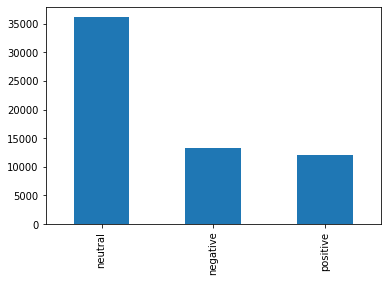

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = new_df.sentiment.map(id2label).value_counts().plot.bar()

In [263]:
import torch
import scipy as sp
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=128,truncation=True) for v in x])
    attention_mask = (tv!=0).type(torch.int64)
    outputs = model(tv,attention_mask=attention_mask)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores)
    return val

In [269]:
explainer = shap.Explainer(f,tokenizer,output_names=labels)

In [281]:
# negative observations
negative_obs = new_df.loc[new_df['sentiment'] == -1]

# positive observations
positive_obs = new_df.loc[new_df['sentiment'] == 1]

In [ ]:
shap_values = explainer(positive_obs[:10].cleaned_content)

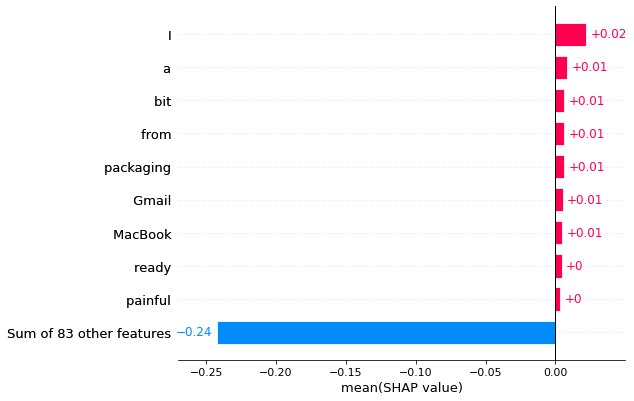

In [278]:
shap.plots.bar(shap_values[:,:,"positive"].mean(0), order=shap.Explanation.argsort.flip)